## <p style="text-align: right;"> &#9989; Joseph Burke</p>

# CMSE 201: Quiz 2 (Spring 2023)

The goal of this quiz is to give you the opportunity to test out more of the skills that you've developed thus far this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your more recently acquired programming skills.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**You cannot use ChatGPT or any other artificial intelligence tool. If you do you get 0 points!!!**

**Do your own work.** This quiz is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the quiz.


![Moira](https://media.giphy.com/media/26gs78HRO8sOuhTkQ/giphy.gif)

---
<a id="toc"></a>

## Table of Contents

[Part 0. Academic Integrity Statement](#part_0) (1 point)

[Part 1. Functions](#part_1)  (11 points)

[Part 2. Visualizing a model with `matplotlib`](#part_2)  (9 points)

[Part 3. Loading a dataset with `numpy`](#part_3) (9 points)


In [1]:
points_list = [1, 11, 9, 9]

print(f"The total number of points is : {sum(points_list)}")

The total number of points is : 30


---
<a id="part_0"></a>

# Part 0. Academic integrity statement (1 points)

[Back to Top](#toc)

In the markdown cell below, put your personal academic integrity statement. By including this statement, you are confirming that you are submitting this as your own work and not that of someone else.


<font size=+3>&#9998;</font> *I, _Joseph Burke_, commit to _ upholding all that is expected of a student of Michigan State University on the grounds of honesty and integrity in the classroom.  I'm greatly excited and thankful for my time at MSU and all the opportunities and clubs I'm exposed to and am apart of, and I hope to stay committed and helpful to those groups as much as possible.  I pledge to stay on top of my work and to source everything I use properly and ethically. I will also advocate for the ethical use of data and the distrubution of clear and honest information, and to educate as many people as I can about the effects of bias in data and algarithms. I will reflect the truth in all of my work and will not spread false information.  I will follow the MSU Policy throughout my entire time here, do and turn in  my own work, and grow from the effort I put into this course.  *

---
<a id="part_1"></a>

# Part 1. Functions (11 points)
[Back to Top](#toc)

## Part 1.1 Write your own function (7 points)
A very important function in a data scientist career is the $p$-distance function, which calculates the sum of the $p$-th power of absolute values of the elements of an array and raises it to the power $(1/p)$. Your task is to code it. It is easier to write the equation for it.

$$ c = \left [ \sum_j {\rm abs}(a_j)^p \right ]^{1/p} $$

**IMPORTANT** Note that the absolute value of each element of the array is raised to the power $p$, then all added together, and then the entire sum is raised to the power $1/p$ and not each element. So you cannot just sum each element.

&#9989;&nbsp; **Do this** Write a function with the following characteristics

* the function's name is `pdistance`
* the function takes in two arguments, `a`, `p`. `a` is a numpy array or a list of numbers and `p` an integer or float.
* the default value of `p` should be set to 2, no default value for `a`.
* the function should calculate $c$ as given by the formula above and return the value of $c$.

**NOTE** You cannot use the function `np.linalg.norm` or `scipy.linalg.norm` to calculate the `p`-distance. If you use it you will only get partial credit. 

In [11]:
import numpy as np
# Write your function here
def pdistance (array, p=2):
    element_list = []
    for i in array:
        element_list.append((np.abs(i))**p)
    c = np.sum(element_list)**(1/p)
    return c

arrays = [1,2,-1,-1,-7]
pdistance(arrays)

7.483314773547883

## Part 1.2: Test your function
[Back to Top](#toc)

Numpy has a similar function called [`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html). The option `ord` is the equivalent of your `p` in `pdistance`. 

&#9989;&nbsp; **Do this (4 points)** Test that your function work correctly by running your function and the numpy function using the two cases below.

* (2 point) Test 1. Calculate the $p = 2$-distance of `test_array_1` using your function and compare it with the numpy's output. **Note** You should not pass the value of `p` to your function. It should use the default value. 

* (2 point) Test 2. Calculate the $p = 4$-distance of `test_array_2` using your function and compare it with numpy's output[`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html). 

Do you the numpy's output and yours agree? If not, go back and fix your code or move on.

In [59]:
import numpy as np

SEED = 81361505

## DO NOT TOUCH THIS LINE. It is needed to ensure you get the right values
rng = np.random.Generator(np.random.PCG64(SEED) )

test_array_1 = np.array([ 3.0, 4.0, 0.0])

test_array_2 = np.random.normal(0, 0.2, size = 100)

# PUT YOUR CODE HERE
print(pdistance(test_array_1))

print(pdistance(test_array_2,4))

np_output_1 = np.linalg.norm(test_array_1)
#print(f"Test 1: pdistance = {YOUR OUTPUT GOES HERE:.2e} , numpy = {np_output_1:.2e}")
print(np_output_1)

np_output_2 = np.linalg.norm(test_array_2, ord = 4)
print(np_output_2)
#print(f"Test 2: pdistance = {YOUR OUTPUT GOES HERE:.2e} , numpy = {np_output_2:.2e}")


5.0
0.641974208218773
5.0
0.641974208218773


---
<a id="part_2"></a>

# Part 2. Visualizing a model using matplotlib (9 points)
[Back to Top](#toc)


In the code cell below there are two models: one for calculating the supply curve and one for the demand curve. 
Both functions requires three arguments. The function `supply_eq` calculates the supply curve according to the equation
$$ Q_s = A p^{\beta}$$ 
where $Q_s$ is the quantity of items produced at the price $p$. The function `demand_eq` calculates the demand curve according to 
$$ Q_d = B - p^{\beta}$$
where, again, $Q_d$ is the quantity of items produced at the price $p$. In both equation $p$ is the price of the product and $\beta$ the exponent of the curve. $A$ and $B$ are factors that affect the curves.

&#9989;&nbsp; **Do the following**
- Use the provided functions, model parameters (given below), and array `price`, to calculate two new arrays modeling the supply and demand. The model parameters are $A = 2$, $B = 300$, $\beta = 2$. (2 points)

- Then, use `matplotlib` to make a plot of both curves as function of price on the same plot. DO NOT USE SUBPLOTS!. (3 points)

- Then use the `plt.axvline()` function to make a line at best price $p = 10$. (1 point)

- Make sure to label your x and y axes and add a legend! (3 points)

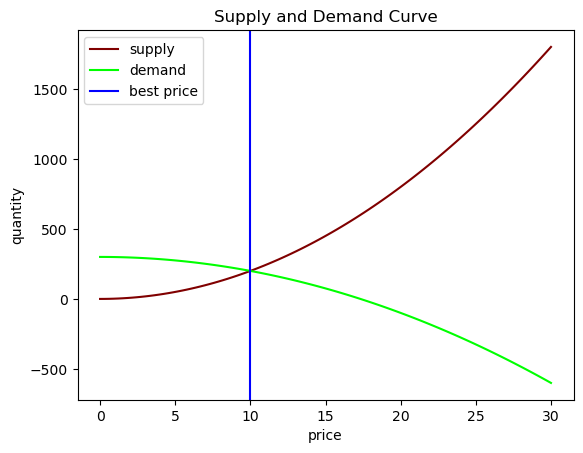

In [32]:
# Will need to use NumPy for the function
import numpy as np
# Will need to import matplotlib for the plotting
import matplotlib.pyplot as plt

# This function calculates temperature over a range of days
def supply_eq(p, A, beta):
    quantity =  A*p**beta
    return quantity
    
def demand_eq(p, B, beta):
    quantity = B - p**beta
    return quantity

# Create days for a full year
price = np.linspace(0,30,100) 

# Put your code here
plt.plot(price,supply_eq(price,2,2),label='supply',color='maroon')
plt.plot(price,demand_eq(price,300,2),label='demand',color='lime')
plt.axvline(10,color='blue',label='best price')
plt.ylabel('quantity')
plt.xlabel('price')
plt.title('Supply and Demand Curve')
plt.legend()


---
<a id="part_3"></a>

# Part 3. Loading a dataset with NumPy and visualizing it (9 points)

[Back to Top](#toc)

Let's plot some data. The file `sd_data.csv` provided with this notebook contains real data of a supply and demand curve. The first column is the price, the second is the supply quantity, and the third the demand quantity. 

&#9989;&nbsp; **Do the following** 

- Use `numpy`, to load the `sd_data.csv` file provided with this notebook. (If you can't figure out how to use NumPy, you can use Pandas for partial credit). (5 points) (2 points for using pandas). 

- Make a _scatter plot_ of the second and third columns versus the first column. (2 points) 

- Label your axis, (2 points)

You should find that your plot of the data, looks similar to the model line from the section above.

**NOTE** if you can't get the data loaded, you can still put your plot commands as you would have done if you had been successful (for partial credit).

In [47]:
# Put your code here
sd_data = np.loadtxt('sd_data.csv', usecols = [0,1,2],delimiter=',',skiprows = 1)  
sd_data

array([[   0.,    0.,  300.],
       [   2.,    6.,  306.],
       [   4.,   42.,  274.],
       [   6.,   89.,  278.],
       [   8.,  153.,  254.],
       [  10.,  279.,  245.],
       [  12.,  318.,  181.],
       [  14.,  272.,   90.],
       [  16.,  513.,  102.],
       [  18.,  656.,   24.],
       [  20.,  805.,  -65.],
       [  22.,  915., -100.],
       [  24., 1177., -186.],
       [  26., 1381., -203.],
       [  28., 1806., -571.]])

Text(0, 0.5, 'quantity')

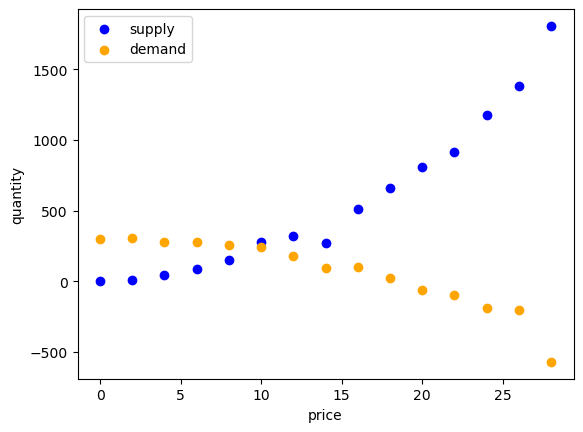

In [57]:
plt.scatter(sd_data[:,0],sd_data[:,1],label = 'supply',color='blue')
plt.scatter(sd_data[:,0],sd_data[:,2], label='demand',color='orange')
plt.legend()
plt.xlabel('price')
plt.ylabel('quantity')

---

# Congratulations, you're done!

Submit this quiz by uploading it to the course Desire2Learn web page.  

Go to the **Quizzes** section, find the submission folder link for **Quiz 02**, and upload it there.


![Moira2](https://media.giphy.com/media/d1E2HnwywoTkES08/giphy.gif)